![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [14]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

filename_features = "./UCI HAR Dataset/features.txt"
filename_labels = "./UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "./UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "./UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "./UCI HAR Dataset/train/y_train.txt"

filename_subtest = "./UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "./UCI HAR Dataset/test/X_test.txt"
filename_ytest = "./UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\alext\AppData\Local\Temp\ipykernel_16556\2682920593.py:22: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\alext\AppData\Local\Temp\ipykernel_16556\2682920593.py:25: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\alext\AppData\Local\Temp\ipykernel_16556\2682920593.py:29: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [15]:
%%time

clf = DecisionTreeClassifier(random_state = 23, ccp_alpha=0.001)
clf.fit(X_train,y_train)

train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)

print(f'Acurácia na base de treino: {round(train_score, 4) * 100}%')
print(f'Acurácia na base de teste: {round(test_score, 4) * 100}%')

Acurácia na base de treino: 97.58%
Acurácia na base de teste: 88.02%
CPU times: total: 3.28 s
Wall time: 3.49 s


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [16]:
%%time
prcomp = PCA(n_components=1).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

print(pc_treino.shape)
print(pc_teste.shape)

# construindo a árvore com PCA com 1 componente principal:
n= 1

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test  = pd.DataFrame( pc_teste[:,:n], columns = colunas)

# fitando a árvore com PCA:
clf_pc = clf.fit(pc_train, y_train)

# avaliando os scores:

train_score = clf.score(pc_train, y_train)
test_score = clf.score(pc_test, y_test)

print(f'Acurácia na base de treino: {round(train_score, 4) * 100}%')
print(f'Acurácia na base de teste: {round(test_score, 4) * 100}%')


(7352, 1)
(2947, 1)
Acurácia na base de treino: 49.97%
Acurácia na base de teste: 45.71%
CPU times: total: 391 ms
Wall time: 127 ms


#### - Houve uma queda significativa da acurácia nas bases de treinamento e de teste;
#### - O tempo de processamento caiu drasticamente.

## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [17]:
# Construindo o modelo com PCA
prcomp = PCA().fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)

In [18]:
%%time

# Usando um laço de repetição para selecionar o número de componentes principais
lista = [1, 2, 5, 10, 50]
score_train = []
score_test = []

for n in lista:
    colunas = ['cp'+str(x+1) for x in list(range(n))]

    pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
    pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)

    clf = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001).fit(pc_train, y_train) # Treinando o modelo

    s_tr = clf.score(pc_train, y_train) # Acrescentando o valor da acurácia de treino na lista score_train
    score_train.append(s_tr)

    s_te = clf.score(pc_test, y_test) # Acrescentando o valor da acurácia de teste na lista score_test
    score_test.append(s_te)

CPU times: total: 1.25 s
Wall time: 651 ms


In [19]:
# Transfomando em DataFrame
df = pd.DataFrame({'qtd_componentes': lista, 'score_treino': score_train, 'score_teste': score_test})
df

,qtd_componentes,score_treino,score_teste
0,1,0.499728,0.457075
1,2,0.612758,0.584662
2,5,0.846028,0.788938
3,10,0.892682,0.823889
4,50,0.919342,0.823210


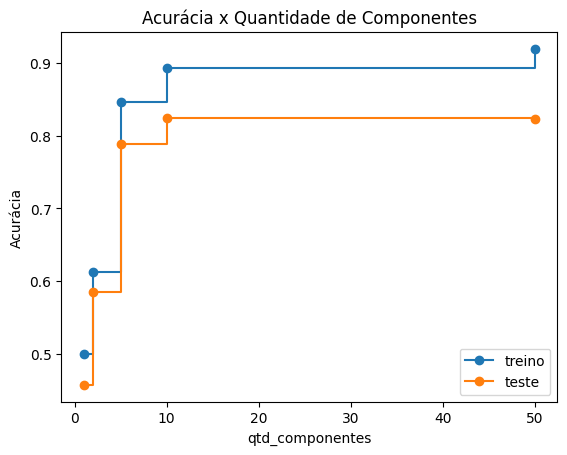

In [20]:
# Gráfico Acurácia x Qtd de componentes
fig, ax = plt.subplots()
ax.set_xlabel("qtd_componentes")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x Quantidade de Componentes")
ax.plot(df['qtd_componentes'], df['score_treino'], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(df['qtd_componentes'], df['score_teste'], marker='o', label="teste", drawstyle="steps-post")

ax.legend()
plt.show()

In [21]:
prcomp = PCA().fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

In [22]:
# Utilizando as 10 primeiras componentes principais
n = 10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)

clf = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001)

In [23]:
%%time

clf = clf.fit(pc_train, y_train)

CPU times: total: 281 ms
Wall time: 88 ms


## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

    1.Houve uma melhora significativa na acurácia em comparação ao modelo com 1 componente principal, embora não tenha sido melhor que o modelo feito através da árvore de decisão;
    2. tempo de processamento é extremamente menor em comparação à árvore de decisão.